In [1]:
data_dir = '/home/vinay/Downloads/projects/data/'
import pandas as pd
df_wz = pd.read_csv(data_dir+'orderbook_resolution_5_2021-03-01_2021-03-24_wazirx.csv')
df_wz['timestamp'] = pd.to_datetime(df_wz['timestamp'])

In [2]:
df_wz.head(4)

,timestamp,exchange,symbol,bid_0_price,ask_0_price,midprice
0,2021-03-01 20:32:05,wazirx,USDTINR,76.76,76.9,76.83
1,2021-03-01 20:32:05,wazirx,BTCINR,3710743.00,3716553.0,3713648.00
2,2021-03-01 20:32:05,wazirx,ETHINR,117505.00,117700.0,117602.50
3,2021-03-01 20:32:10,wazirx,BTCINR,3710743.00,3716553.0,3713648.00


In [3]:
df_ftx = pd.read_csv(data_dir+'orderbook_resolution_5_2021-03-01_2021-03-24_ftx.csv')
df_ftx['timestamp'] = pd.to_datetime(df_ftx['timestamp'])
df_ftx.head(4)

,timestamp,exchange,symbol,bid_0_price,ask_0_price,midprice
0,2021-03-01 20:32:05,ftx,ETHUSD,1534.8000,1535.2000,1535.00000
1,2021-03-01 20:32:05,ftx,BTCUSD,48344.0000,48351.0000,48347.50000
2,2021-03-01 20:32:05,ftx,USDTUSD,1.0011,1.0012,1.00115
3,2021-03-01 20:32:10,ftx,ETHUSD,1534.9000,1535.0000,1534.95000


In [4]:
len(df_wz),len(df_ftx)

(1062827, 1151397)

In [5]:
wzr_btc = df_wz[df_wz['symbol'] == 'BTCINR'][['timestamp','midprice']].copy().rename({'midprice':'midbtc'},axis=1).set_index('timestamp')
wzr_eth = df_wz[df_wz['symbol'] == 'ETHINR'][['timestamp','midprice']].copy().rename({'midprice':'mideth'},axis=1).set_index('timestamp')
usd_inr = df_wz[df_wz['symbol'] == 'USDTINR'][['timestamp','midprice']].copy().rename({'midprice':'usdinr'},axis=1).set_index('timestamp')
ftx_btcusd = df_ftx[df_ftx['symbol'] == 'BTCUSD'][['timestamp','midprice']].copy().rename({'midprice':'ftx_midbtc_usd'},axis=1).set_index('timestamp')
ftx_ethusd = df_ftx[df_ftx['symbol'] == 'ETHUSD'][['timestamp','midprice']].copy().rename({'midprice':'ftx_mideth_usd'},axis=1).set_index('timestamp')


In [6]:
t = pd.concat([wzr_btc,wzr_eth,usd_inr,ftx_btcusd,ftx_ethusd],join='inner',axis=1)
t['midbtc_ftx'] = t['ftx_midbtc_usd']*t['usdinr']
t['mideth_ftx'] = t['ftx_mideth_usd']*t['usdinr']
t.drop(labels=['ftx_midbtc_usd','ftx_mideth_usd'],axis=1,inplace=True)

In [60]:
t['time'] = pd.to_datetime(t.index)
t.head(2)
t.sort_index(axis=0,inplace=True)

In [61]:
# Checking to see if all the data is at 5s resolution.
time_diff = t['time'].diff(1).dt.total_seconds().dropna()
bad_ids = (time_diff != 5.0)
time_diff[bad_ids]

timestamp
2021-03-01 20:34:35    65.0
2021-03-01 20:45:55    10.0
2021-03-01 21:01:55    10.0
2021-03-01 21:35:15    10.0
2021-03-01 21:35:30    15.0
                       ... 
2021-03-24 12:36:00    10.0
2021-03-24 12:36:55    15.0
2021-03-24 12:37:25    15.0
2021-03-24 12:42:25    10.0
2021-03-24 12:57:50    60.0
Name: time, Length: 4266, dtype: float64

In [62]:
time_diff[bad_ids].describe()

count     4266.000000
mean       109.968354
std       1767.093090
min         10.000000
25%         10.000000
50%         50.000000
75%         65.000000
max      78650.000000
Name: time, dtype: float64

In [63]:
np.where(np.array([True,False,True]))

(array([0, 2]),)

In [64]:
import numpy as np
bad_index = np.where(bad_ids.values)

In [65]:
# missing values
bad_index[0].shape[0]*100/len(t)


1.4105230441639858

In [68]:
t.iloc[bad_index[0][0]-2:bad_index[0][0]+3]

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx,time
timestamp,,,,,,
2021-03-01 20:33:20,3713833.5,117602.50,76.810,3.718833e+06,118045.44850,2021-03-01 20:33:20
2021-03-01 20:33:25,3714206.0,117602.50,76.815,3.718499e+06,118053.13275,2021-03-01 20:33:25
2021-03-01 20:33:30,3715557.0,117602.50,76.815,3.718345e+06,118053.13275,2021-03-01 20:33:30
2021-03-01 20:34:35,3718089.5,117338.45,76.765,3.713737e+06,118022.34925,2021-03-01 20:34:35
2021-03-01 20:34:40,3715742.5,117353.05,76.765,3.712355e+06,117976.29025,2021-03-01 20:34:40


In [136]:
t.head(5)

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx,time
timestamp,,,,,,
2021-03-01 20:32:05,3713648.0,117602.5,76.830,3.714538e+06,117934.05000,2021-03-01 20:32:05
2021-03-01 20:32:10,3713648.0,117602.5,76.745,3.711772e+06,117799.73775,2021-03-01 20:32:10
2021-03-01 20:32:15,3713648.0,117602.5,76.745,3.711964e+06,117803.57500,2021-03-01 20:32:15
2021-03-01 20:32:20,3710771.0,117602.5,76.745,3.712501e+06,117826.59850,2021-03-01 20:32:20
2021-03-01 20:32:25,3710771.0,117602.5,76.745,3.714036e+06,117868.80825,2021-03-01 20:32:25


In [92]:
from collections import Counter
missing_ids = pd.DataFrame({'misid':bad_index[0]})
missing_ids.iloc[0]

misid    17
Name: 0, dtype: int64

In [106]:
import time, datetime
from datetime import datetime, timedelta

(t.iloc[18].time - t.iloc[17].time).total_seconds()

65.0

In [107]:
t.iloc[17:19]

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx,time
timestamp,,,,,,
2021-03-01 20:33:30,3715557.0,117602.50,76.815,3.718345e+06,118053.13275,2021-03-01 20:33:30
2021-03-01 20:34:35,3718089.5,117338.45,76.765,3.713737e+06,118022.34925,2021-03-01 20:34:35


In [113]:
missing_ids['cont_chunk_sz'] = (missing_ids-missing_ids.shift(1))


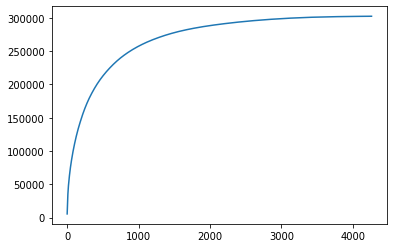

In [137]:
import matplotlib.pyplot as plt
cumsum = missing_ids.sort_values(by='cont_chunk_sz',ascending=False)['cont_chunk_sz'].cumsum().values[:-1]
plt.plot(cumsum)


In [140]:
cumsum[1]

8914.0

In [141]:
pct_data_covered = cumsum*100/cumsum[-1]
np.where(pct_data_covered>70)[0][0]

493

In [173]:
# Just do forward fill and proceed
t['date'] = t['time'].dt.date
take_days = t.groupby('date').count()['time']>=15000
take_days_list = take_days[take_days].index
def good_days(ele):
    return ele in take_days_list


In [174]:
new_t = t[t['date'].apply(good_days)].copy()


In [181]:
new_t.groupby('date').first()

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx,time
date,,,,,,
2021-03-02,3701550.0,116310.10,76.805,3.726771e+06,116981.69550,2021-03-02 00:00:50
2021-03-04,3884243.5,122613.10,75.695,3.891783e+06,122909.75625,2021-03-04 00:01:05
2021-03-05,3700573.5,117605.90,75.930,3.674556e+06,117467.50650,2021-03-05 00:00:00
2021-03-06,3710499.0,115876.35,76.005,3.690195e+06,115941.82725,2021-03-06 00:00:00
2021-03-07,3637927.0,121325.00,75.810,3.665110e+06,122217.09150,2021-03-07 00:00:00
2021-03-13,4328249.5,133529.40,75.555,4.334590e+06,134091.23625,2021-03-13 00:01:45
2021-03-14,4482849.0,142002.80,74.685,4.489913e+06,142364.54700,2021-03-14 00:01:40
2021-03-23,4304044.5,134386.10,75.645,4.310441e+06,134545.97925,2021-03-23 00:00:00


In [182]:
new_t.groupby('date').last()

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx,time
date,,,,,,
2021-03-02,3710609.0,117181.00,76.930,3.681024e+06,116145.06750,2021-03-02 23:59:55
2021-03-04,3700573.5,117605.90,75.930,3.672468e+06,117402.96600,2021-03-04 23:59:55
2021-03-05,3710499.0,115876.35,76.005,3.690841e+06,115964.62875,2021-03-05 23:59:55
2021-03-06,3636629.0,121325.00,75.810,3.663670e+06,122118.53850,2021-03-06 23:59:55
2021-03-07,3795499.5,124800.00,74.915,3.795156e+06,124677.28875,2021-03-07 23:59:55
2021-03-13,4477348.5,141675.00,74.610,4.491447e+06,142437.95100,2021-03-13 23:59:50
2021-03-14,4523796.0,140499.00,75.010,4.502925e+06,140272.45050,2021-03-14 23:59:55
2021-03-23,4210788.5,130097.15,75.820,4.232007e+06,130414.19100,2021-03-23 23:59:55


In [212]:
one_day = new_t[new_t['date'] == take_days_list[0]]
# we need 17280 rows .. let's just forward fill it with linear inc

In [214]:
resampled_data = one_day.resample('5s').asfreq().interpolate().drop(['time','date'],axis=1)

In [216]:
resampled_data.isna().sum()

midbtc        0
mideth        0
usdinr        0
midbtc_ftx    0
mideth_ftx    0
dtype: int64

In [234]:
resampled_data

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx
timestamp,,,,,
2021-03-02 00:00:50,3701550.0,116310.1,76.805,3.726771e+06,116981.69550
2021-03-02 00:00:55,3700439.5,116310.1,76.805,3.729574e+06,117020.09800
2021-03-02 00:01:00,3700439.5,116399.5,76.745,3.724934e+06,116798.21550
2021-03-02 00:01:05,3700439.5,115871.3,76.745,3.724512e+06,116825.07625
2021-03-02 00:01:10,3700737.0,115871.3,76.805,3.727001e+06,116820.40500
...,...,...,...,...,...
2021-03-02 23:59:35,3710609.5,117249.2,76.945,3.681895e+06,116183.10275
2021-03-02 23:59:40,3710609.0,117249.2,76.935,3.680686e+06,116137.22925
2021-03-02 23:59:45,3710609.0,117249.2,76.935,3.680955e+06,116144.92275


## Checking Indicators

In [271]:
from custom_finta import TA

In [301]:
(TA.STOCHCLOSE({'close':resampled_data['midbtc'],'low':resampled_data['midbtc'],'high':resampled_data['midbtc']},70))

timestamp
2021-03-02 00:00:50           NaN
2021-03-02 00:00:55           NaN
2021-03-02 00:01:00           NaN
2021-03-02 00:01:05           NaN
2021-03-02 00:01:10           NaN
                          ...    
2021-03-02 23:59:35    100.000000
2021-03-02 23:59:40     99.996787
2021-03-02 23:59:45     99.996748
2021-03-02 23:59:50     99.996496
2021-03-02 23:59:55     99.996496
Freq: 5S, Name: 70 period STOCH %K, Length: 17270, dtype: float64

In [304]:
getattr(TA,'STOCHCLOSE')({'close':resampled_data['midbtc'],'low':resampled_data['midbtc'],'high':resampled_data['midbtc']},70)

timestamp
2021-03-02 00:00:50           NaN
2021-03-02 00:00:55           NaN
2021-03-02 00:01:00           NaN
2021-03-02 00:01:05           NaN
2021-03-02 00:01:10           NaN
                          ...    
2021-03-02 23:59:35    100.000000
2021-03-02 23:59:40     99.996787
2021-03-02 23:59:45     99.996748
2021-03-02 23:59:50     99.996496
2021-03-02 23:59:55     99.996496
Freq: 5S, Name: 70 period STOCH %K, Length: 17270, dtype: float64

In [ ]:
config = 
{
    "ti":{
        "MACD":[(5,10,10),(10,20,10)],
        "STOCH":[(10),(20)],
        "BBANDSTDDIST":[(10),(20)],
        "PEAKMINUSTROUGH":[(10),(20)],
        "RSI":[(10),(20)]
    }
    
}

In [269]:
from ta import RSIIndicator,MACD,StochasticOscillator
Rsi = RSIIndicator(close=resampled_data['midbtc'],window=10)
Rsi.rsi().isna().sum()

9

In [261]:
Macd = MACD(resampled_data['midbtc'],5,10,10)
Macd.macd_diff().describe()

count    17252.000000
mean        -0.039130
std        469.028773
min      -3757.912522
25%       -188.621520
50%         -3.035751
75%        196.783933
max       2805.310646
Name: MACD_diff_10_5, dtype: float64

In [270]:
Stoch = StochasticOscillator(resampled_data['midbtc'].copy(),resampled_data['midbtc'].copy(),resampled_data['midbtc'].copy(),10)
Stoch.stoch().isna().sum()

191

<AxesSubplot:xlabel='timestamp'>

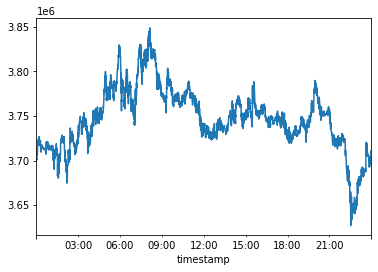

In [232]:
resampled_data['midbtc'].plot()

<AxesSubplot:xlabel='timestamp'>

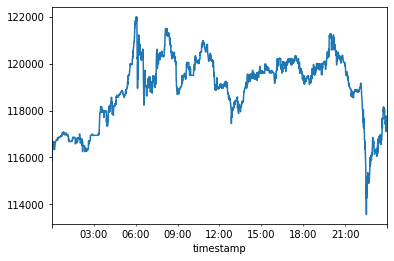

In [233]:
resampled_data['mideth'].plot()

In [13]:
inds = []
for ind,ele in enumerate(time_diff==50.0):
    if ele == True:
        inds.append(ind)
        

In [15]:
t.iloc[inds[0]-2:inds[0]+3]

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx,time
timestamp,,,,,,
2021-03-06 15:45:55,3659010.0,118468.6,75.625,3.649700e+06,118924.09375,2021-03-06 15:45:55
2021-03-06 15:46:00,3659010.0,118468.6,75.625,3.649814e+06,118924.09375,2021-03-06 15:46:00
2021-03-06 15:46:05,3659010.0,118468.6,75.625,3.649889e+06,118931.65625,2021-03-06 15:46:05
2021-03-06 15:46:55,3656572.0,118468.6,75.605,3.648357e+06,118858.62050,2021-03-06 15:46:55
2021-03-06 15:47:00,3656572.0,118468.6,75.605,3.646543e+06,118858.62050,2021-03-06 15:47:00


In [21]:
import time, datetime
from datetime import datetime, timedelta
t.iloc[inds[0]].time + timedelta(seconds=5)

Timestamp('2021-03-06 15:46:10')

In [141]:
np.unique(time_diff[bad_ids])

array([1.0000e+01, 1.5000e+01, 2.0000e+01, 2.5000e+01, 3.0000e+01,
       3.5000e+01, 4.0000e+01, 4.5000e+01, 5.0000e+01, 5.5000e+01,
       6.0000e+01, 6.5000e+01, 7.0000e+01, 7.5000e+01, 8.0000e+01,
       8.5000e+01, 9.0000e+01, 9.5000e+01, 1.0000e+02, 1.0500e+02,
       1.1000e+02, 1.1500e+02, 1.2000e+02, 1.2500e+02, 1.3000e+02,
       1.3500e+02, 1.4000e+02, 1.4500e+02, 1.5000e+02, 1.5500e+02,
       1.6000e+02, 1.6500e+02, 1.7000e+02, 1.7500e+02, 1.8000e+02,
       1.8500e+02, 1.9000e+02, 1.9500e+02, 2.0000e+02, 2.0500e+02,
       2.1000e+02, 2.1500e+02, 2.2000e+02, 2.2500e+02, 2.3500e+02,
       2.4000e+02, 2.5000e+02, 2.6000e+02, 2.7500e+02, 2.8000e+02,
       2.8500e+02, 2.9000e+02, 3.0000e+02, 3.1000e+02, 3.1500e+02,
       3.3500e+02, 3.4000e+02, 3.5000e+02, 3.6500e+02, 5.7500e+02,
       7.3000e+02, 1.6200e+03, 3.4750e+03, 3.6050e+03, 5.2650e+03,
       9.3300e+03, 1.2320e+04, 1.2780e+04, 1.5225e+04, 2.4795e+04,
       3.2955e+04, 6.9110e+04, 7.8650e+04])

In [148]:
t['date'] = t['time'].dt.date
t.groupby('date').count()['time']


date
2021-03-01     2195
2021-03-02    15314
2021-03-03    12718
2021-03-04    16045
2021-03-05    15843
2021-03-06    15999
2021-03-07    15917
2021-03-08    13708
2021-03-09    12101
2021-03-10     4457
2021-03-11     9127
2021-03-12     5115
2021-03-13    15690
2021-03-14    15112
2021-03-15    14570
2021-03-16    10949
2021-03-17    14559
2021-03-18    10845
2021-03-19    13681
2021-03-20    14775
2021-03-21    14418
2021-03-22    14902
2021-03-23    15382
2021-03-24     9019
Name: time, dtype: int64

## This data is fucked up so badly..welcome to real world.

### let's just see the plane wazirx data


In [157]:
df_wz['date'] = df_wz['timestamp'].dt.date
df_wz[df_wz['symbol'] == 'BTCINR'].groupby('date').count()['timestamp']

date
2021-03-01     2350
2021-03-02    16292
2021-03-03    13300
2021-03-04    16746
2021-03-05    16686
2021-03-06    16607
2021-03-07    16643
2021-03-08    16324
2021-03-09    13048
2021-03-10     4531
2021-03-11    16586
2021-03-12    14850
2021-03-13    16545
2021-03-14    16404
2021-03-15    16108
2021-03-16    11842
2021-03-17    16524
2021-03-18    16832
2021-03-19    15032
2021-03-20    16218
2021-03-21    15992
2021-03-22    16359
2021-03-23    16493
2021-03-24     9231
Name: timestamp, dtype: int64

### Even orginal data is reasonably fucked.